In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

## 1st experiment

     measure     T
0          1  1.86
1          2  1.91
2          3  1.71
3          4  1.84
4          5  1.72
..       ...   ...
98        99  1.91
99       100  1.92
100      101  1.85
101      102  1.85
102      103  1.84

[103 rows x 2 columns]
1.51 1.98
0.047
v_bin : [1.5335, 1.5805, 1.6275, 1.6745, 1.7215, 1.7685, 1.8155000000000001, 1.8625, 1.9095, 1.9565000000000001]
1.86 0 0
1.91 0 1
1.71 0 2
1.84 0 3
1.72 0 4
1.91 0 5
1.71 0 6
1.91 0 7
1.85 0 8
1.78 0 9
1.85 0 10
1.7 0 11
1.64 0 12
1.84 0 13
1.78 0 14
1.98 0 15
1.91 0 16
1.92 0 17
1.85 0 18
1.65 0 19
1.92 0 20
1.72 0 21
1.83 0 22
1.85 0 23
1.77 0 24
1.77 0 25
1.84 0 26
1.72 0 27
1.85 0 28
1.78 0 29
1.78 0 30
1.71 0 31
1.92 0 32
1.78 0 33
1.79 0 34
1.83 0 35
1.91 0 36
1.72 0 37
1.83 0 38
1.85 0 39
1.85 0 40
1.78 0 41
1.71 0 42
1.77 0 43
1.77 0 44
1.77 0 45
1.78 0 46
1.71 0 47
1.72 0 48
1.91 0 49
1.65 0 50
1.72 0 51
1.51 0 52
1.71 0 53
1.77 0 54
1.71 0 55
1.77 0 56
1.71 0 57
1.71 0 58
1.72 0 59
1.71 0 60
1.9 0 61
1.78 0 62
1

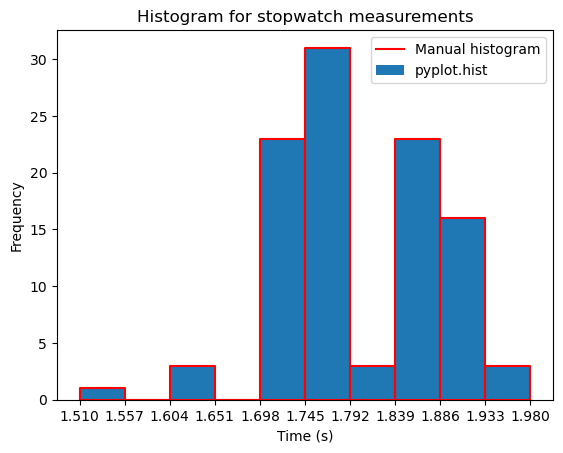

In [3]:
data_chrono = pd.read_csv("data/TD2/data_acquis_chrono.csv")
print(data_chrono)

# manually make histogram
N_BIN = 10
t_min = data_chrono['T'].min()
t_max = data_chrono['T'].max()
print(t_min, t_max)
interval_size = (t_max-t_min)/N_BIN
print(interval_size)
v_bin = [0 for i in range(N_BIN)]
# central position of each bin
for i in range(N_BIN):
    v_bin[i] = i*interval_size + interval_size/2 + t_min
print(f"v_bin : {v_bin}")
hist_v = [0 for i in range(N_BIN)]
for i in range(N_BIN):
    count = 0 # number of measurings that fit in bin i
    for j in range(len(data_chrono['T'])):
        print(data_chrono['T'][j], i, j)
        if (data_chrono['T'][j] >= (v_bin[i] - interval_size/2)) and (data_chrono['T'][j] < (v_bin[i] + interval_size/2)):
            count += 1
    hist_v[i] = count

print(hist_v)


# draw histogram
xticks = np.array(v_bin + [(v_bin[-1]+interval_size)])-interval_size/2
plt.xticks(xticks)
for i in range(N_BIN):
    freq_coords = [0, hist_v[i], hist_v[i], 0, 0]
    time_coords = [v_bin[i]-interval_size/2, v_bin[i]-interval_size/2, v_bin[i]+interval_size/2, v_bin[i]+interval_size/2, v_bin[i]-interval_size/2]
    if i == 0 :
        plt.plot(time_coords, freq_coords, marker='',linestyle='-',color='red', label="Manual histogram")
    else :
        plt.plot(time_coords, freq_coords, marker='',linestyle='-',color='red')
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Histogram for stopwatch measurements")
#plt.show()

#use plt.hist
'''
bin_edges = [0 for i in range(2*N_BIN)]
for i in range(N_BIN):
    bin_edges[2*i] = v_bin[i] - interval_size/2
    bin_edges[2*i+1] = v_bin[i] + interval_size/2
plt.hist(hist_v, bins=N_BIN)
plt.show()
'''

plt.hist(data_chrono['T'], bins=N_BIN, label="pyplot.hist")
plt.legend()
plt.show()


# plt.his




#print(hist_v)


Red outline is hand made, the blue columns are outputted by the python function


## 2nd experiment

In [4]:
def std_deviation(x, mean):
    return np.sqrt(np.sum([(e-mean)**2 for e in x]) / len(x) )

def normal_distrib(x, mean, sigma):
    gauss = np.exp(-0.5*((x-mean)/sigma)**2)
    return gauss / (sigma*np.sqrt(2*np.pi))

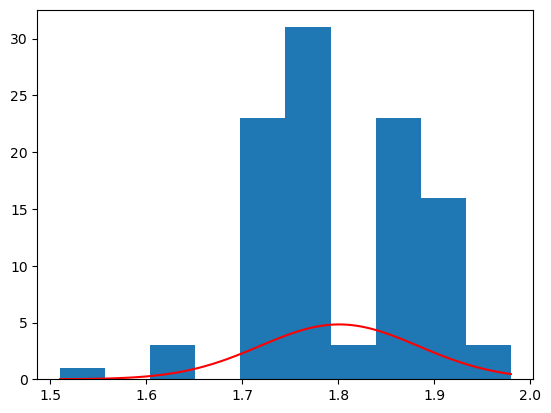

Hand std 0.08258101989457484, numpy std 0.08258101989457484


In [5]:
fall_data = data_chrono['T']

mean_time = np.mean(fall_data)
sigma = std_deviation(fall_data, mean_time)

x = np.linspace(fall_data.min(), fall_data.max(), 100)

normal_dist = normal_distrib(x, mean_time, sigma)


plt.hist(fall_data, bins=N_BIN, color=None)
plt.plot(x, normal_dist, color="r")

plt.show()

print(f"Hand std {sigma}, numpy std {np.std(fall_data)}")

### Monte Carlo

In [6]:
# random values following normal distribution
mu = 5
sig = 0.2
X1 = np.random.normal(mu, sig, 20)
X2 = np.random.normal(mu, sig, 100)
X3 = np.random.normal(mu, sig, 5000)

x_theo = np.linspace(np.min(X3), np.max(X3), 1000)



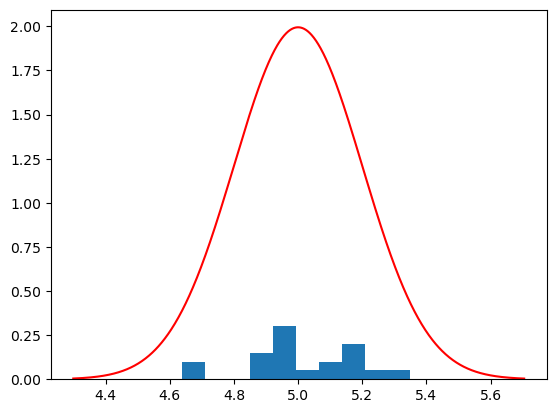

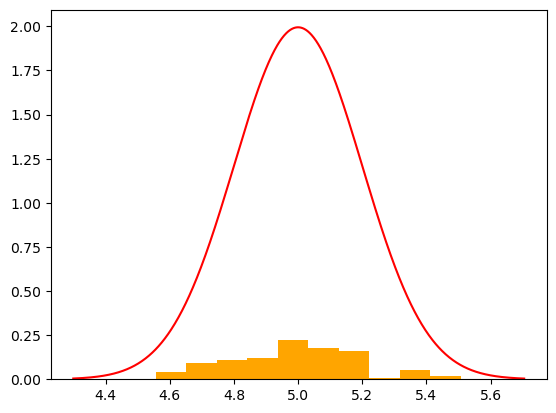

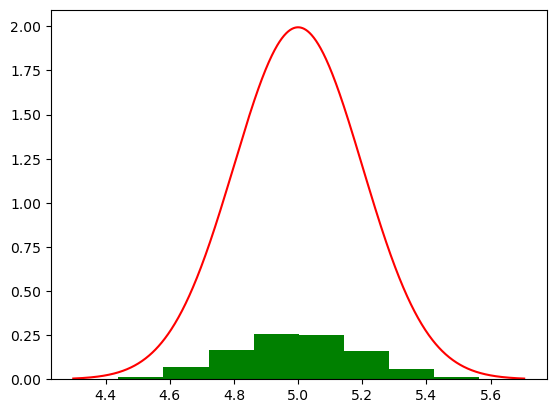

N = 20, sigma=0.17192807235148258, mean=5.011180655387681
N = 100, sigma=0.19412383303374345, mean=4.989856469661213
N = 5000, sigma=0.20002472685161332, mean=4.997999039029597


In [31]:
# need to find a way to either normalise the height of the histogram or

plt.hist(X1, bins=10, weights=np.ones(20)/20)
plt.plot(x_theo, normal_distrib(x_theo, mu, sig), color="r")
plt.show()
plt.hist(X2, bins=10, color="orange", weights=np.ones(100)/100)
plt.plot(x_theo, normal_distrib(x_theo, mu, sig), color="r")
plt.show()
plt.hist(X3, bins=10, color="g", weights=np.ones(5000)/5000)
plt.plot(x_theo, normal_distrib(x_theo, mu, sig), color="r")

plt.show()


print(f"N = 20, sigma={np.std(X1)}, mean={np.mean(X1)}")
print(f"N = 100, sigma={np.std(X2)}, mean={np.mean(X2)}")
print(f"N = 5000, sigma={np.std(X3)}, mean={np.mean(X3)}")

The 'experimental' mean and standard deviation approach the real values of $μ=5$ and $σ=0.2$ as $N \to ∞$

In [8]:
mu_x = 2
sig_x = 0.05

mu_y = 3
sig_y = 0.1

N = 500

Xmc = np.random.normal(mu_x, sig_x, N)
Ymc = np.random.normal(mu_y, sig_y, N)

print(f"mean X = {np.mean(Xmc)}")
print(f"mean Y = {np.mean(Ymc)}")

Zmc = Xmc + Ymc
print(f"Z, mean={np.mean(Zmc)}, sigma={np.std(Zmc)}")
sig_Z_from_formula = np.sqrt(np.std(Xmc)**2 + np.std(Ymc)**2)
print(f"Compared to the result from formula, std Z = {sig_Z_from_formula}")

Wmc = Xmc * Ymc
print(f"W, mean={np.mean(Wmc)}, sigma={np.std(Wmc)}")
sig_W_from_formula = np.mean(Wmc) * np.sqrt((np.std(Xmc)/np.mean(Xmc))**2 + (np.std(Ymc)/np.mean(Ymc))**2)
print(f"Compared to the result from formula, std W = {sig_W_from_formula}")


mean X = 1.9957050134244874
mean Y = 2.999982224241445
Z, mean=4.9956872376659325, sigma=0.11327245745696939
Compared to the result from formula, std Z = 0.11519288557605256
W, mean=5.986860189468499, sigma=0.2493492895555379
Compared to the result from formula, std W = 0.2545896549510872


Conclusion, the formulas are pretty good

## Exercise 5 (refraction index)

In [9]:
N = 500
mu_A = np.deg2rad(60) # deg
sig_A = np.deg2rad(2/60) # deg

mu_D = np.deg2rad(53 + 35/60)
sig_D = np.deg2rad(2/60)

Amc = np.random.normal(mu_A, sig_A, N)
Dmc = np.random.normal(mu_D, sig_D, N)

#print(Amc, Dmc)

In [10]:
n_mc = np.sin((Amc+Dmc)/2)/np.sin(Amc/2)
mu_n = np.mean(n_mc)
sig_n = np.std(n_mc)
print(f"n: mean={mu_n}, std={sig_n}")

# do this another day
#def partial_D(A,)


n: mean=1.6734058310673463, std=0.0006005313453886418


Data preparation

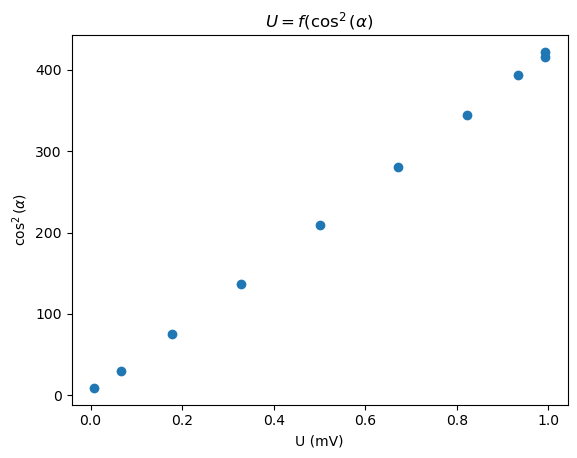

In [11]:
malus_data = pd.read_csv("data/dataMalus.csv")
#print(malus_data)#["U (en mV)"])
alpha = np.deg2rad(malus_data["alpha (en degre)"])
U = malus_data["U (en mV)"]

# systematique error of -5 degrees
alpha_0 = np.deg2rad(-5)

cos2_alpha = np.cos(alpha+alpha_0)**2
plt.scatter(cos2_alpha, U)
plt.title(r"$U=f(\cos^2(\alpha)$")
#plt.legend()
plt.xlabel("U (mV)")
plt.ylabel(r"$\cos^2(\alpha)$")
plt.show()


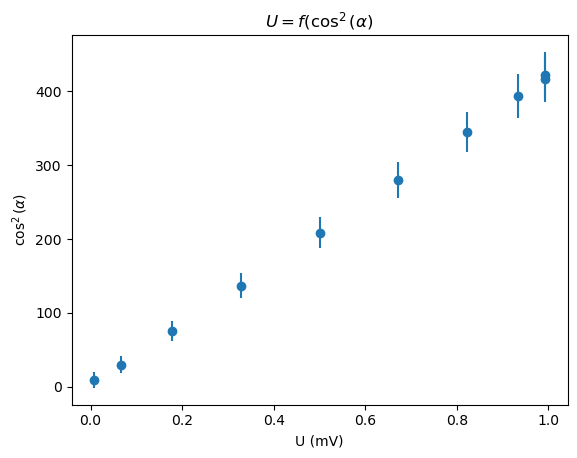

In [12]:
U_err = np.abs(U*0.05) + 10
plt.errorbar(cos2_alpha, U, fmt="o", yerr=U_err)
plt.title(r"$U=f(\cos^2(\alpha)$")
#plt.legend()
plt.xlabel("U (mV)")
plt.ylabel(r"$\cos^2(\alpha)$")
plt.show()

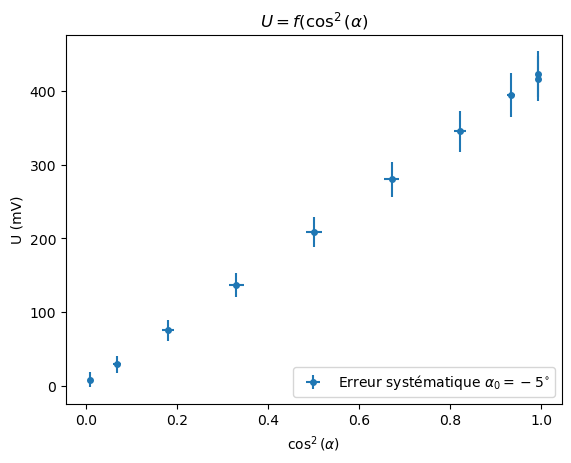

In [13]:
# monte carlo method to simulate error propagation
sig_alpha = np.deg2rad(1)

sig_cos2 = np.zeros(len(alpha))

for i in range(len(alpha)):
    a = alpha[i] + alpha_0
    a_mc = np.random.normal(a, sig_alpha, 10000)
    
    cos2 = np.cos(a_mc)**2

    # std
    sig_cos2[i] = np.std(cos2)


plt.errorbar(cos2_alpha, U, fmt="o", yerr=U_err, xerr=sig_cos2, markersize=4, label=r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")
plt.title(r"$U=f(\cos^2(\alpha)$")
plt.legend(loc="lower right")
plt.ylabel("U (mV)")
plt.xlabel(r"$\cos^2(\alpha)$")

#plt.text(100, 200, r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")

plt.show()







### C.2 Retour sur l'ajustement linéaire

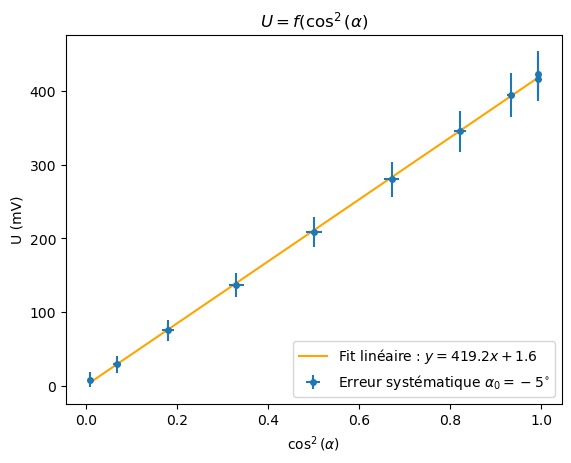

In [14]:
N = len(cos2_alpha)
Delta = N*np.sum(cos2_alpha**2) - np.sum(cos2_alpha)**2

A = (N*np.sum(cos2_alpha*U) - np.sum(cos2_alpha)*np.sum(U))/Delta
B = (np.sum(U)*np.sum(cos2_alpha**2) - np.sum(cos2_alpha)*np.sum(U*cos2_alpha))/Delta

plt.errorbar(cos2_alpha, U, fmt="o", yerr=U_err, xerr=sig_cos2, markersize=4, label=r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")
plt.plot(cos2_alpha, (A*cos2_alpha + B), color="orange", zorder=-4, label=f"Fit linéaire : $y = {A:0.1f}x + {B:0.1f}$")
plt.title(r"$U=f(\cos^2(\alpha)$")
plt.legend(loc="lower right")
plt.ylabel("U (mV)")
plt.xlabel(r"$\cos^2(\alpha)$")

#plt.text(100, 200, r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")

plt.show()


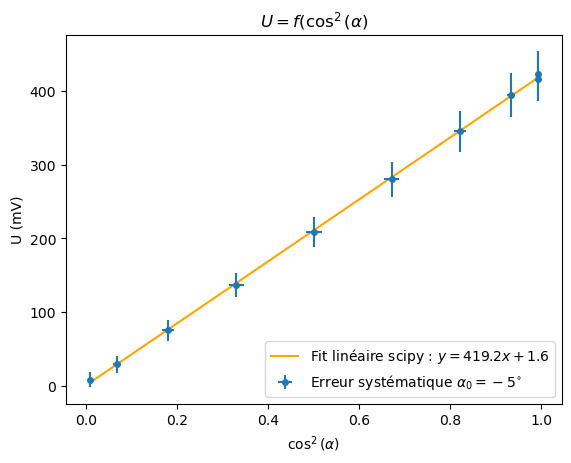

In [15]:
def lin_model(x, a, b):
    return a*x + b

popt, pcov = curve_fit(lin_model, cos2_alpha, U)
A_scipy, B_scipy = popt


plt.errorbar(cos2_alpha, U, fmt="o", yerr=U_err, xerr=sig_cos2, markersize=4, label=r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")
plt.plot(cos2_alpha, (A_scipy*cos2_alpha + B_scipy), color="orange", zorder=-4, label=f"Fit linéaire scipy : $y = {A_scipy:0.1f}x + {B_scipy:0.1f}$")
plt.title(r"$U=f(\cos^2(\alpha)$")
plt.legend(loc="lower right")
plt.ylabel("U (mV)")
plt.xlabel(r"$\cos^2(\alpha)$")

#plt.text(100, 200, r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")

plt.show()


## C.3 Estimation des incertitudes sur les paramètres de l'ajustement

In [16]:
# store coeffs for each model in a 2D array
n_models = 1000
coeffs = np.zeros((n_models, 2))
#print(coeffs)
#print(np.shape(cos2_alpha))
for i in range(n_models):
    # taking cos2_alpha as the mean of the distribution
    x_mc = np.random.normal(cos2_alpha, sig_cos2)

    y_mc = np.random.normal(U, U_err)
    
    #print(np.shape(x_mc), np.shape(y_mc))
    popt, pcov = curve_fit(lin_model, x_mc, y_mc)
    #popt, pcov = curve_fit(lin_model, cos2_alpha, U)
    

    #print(popt)
    coeffs[i] = popt
    #print(coeffs[i][0])
    #input()
    #coeffs[i][0] = A
    #coeffs[i][1] = B


coeffs_t = np.transpose(coeffs)

#print(coeffs)
#print(coeffs_t)

A_mean = np.mean(coeffs_t[0])
A_std = np.std(coeffs_t[0])

print(f"A – mean : {A_mean}, std : {A_std}")

B_mean = np.mean(coeffs_t[1])
B_std = np.std(coeffs_t[1])

print(f"B – mean : {B_mean}, std : {B_std}")


A – mean : 418.55373479873447, std : 19.580800006562754
B – mean : 1.6321622879860704, std : 8.613714624199782


Ex. 8

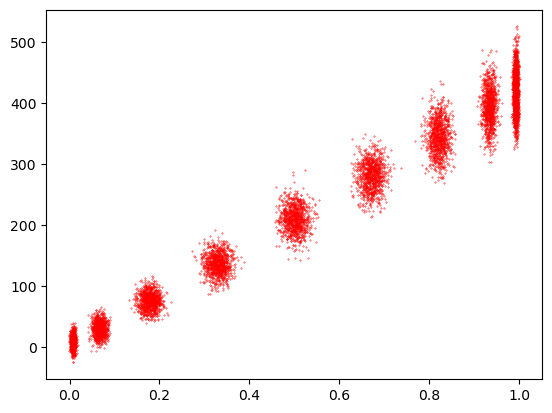

<Figure size 3000x2400 with 0 Axes>

In [17]:
def gen_dataset(x, y, x_std, y_std):
    return np.random.normal(x, x_std), np.random.normal(y, y_std)

for i in range(n_models):
    cos2_mc, U_mc = gen_dataset(cos2_alpha, U, sig_cos2, U_err)

    #popt, pcov = curve_fit(lin_model, cos2_mc, U_mc)
    #A, B = popt
    #print(A, B)

    #plt.plot(cos2_mc, A*cos2_mc+B, color="r", alpha=0.1, zorder=-1)

    plt.scatter(cos2_mc, U_mc, color="r", s=0.1)

plt.figure(figsize=(10, 8), dpi=300)
plt.show()

Text(0.5, 0, '$\\cos^2(\\alpha)$')

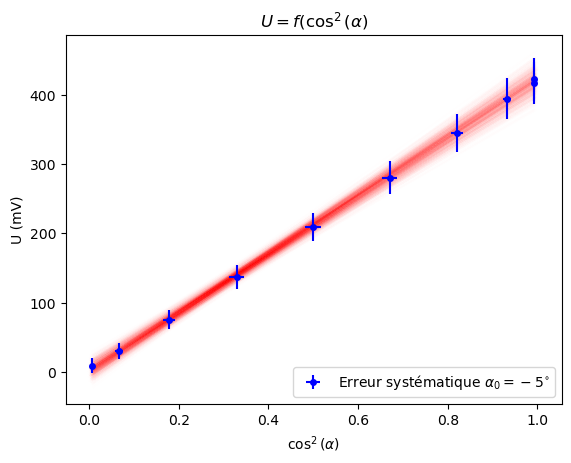

In [18]:
As = np.zeros(n_models)
Bs = np.zeros(n_models)

for i in range(n_models):
    cos2_mc, U_mc = gen_dataset(cos2_alpha, U, sig_cos2, U_err)

    popt, pcov = curve_fit(lin_model, cos2_mc, U_mc)
    A, B = popt
    As[i] = A
    Bs[i] = B

    plt.plot(cos2_mc, A*cos2_mc+B, color="r", alpha=5/n_models, zorder=-1)

plt.errorbar(cos2_alpha, U, fmt="o", yerr=U_err, xerr=sig_cos2, markersize=4, label=r"Erreur systématique $\alpha_0 = -5 ^{\circ}$", color="b")
plt.title(r"$U=f(\cos^2(\alpha)$")
plt.legend(loc="lower right")
plt.ylabel("U (mV)")
plt.xlabel(r"$\cos^2(\alpha)$")
    
    

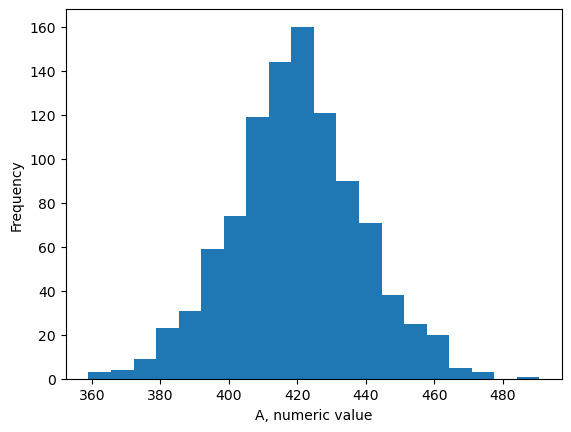

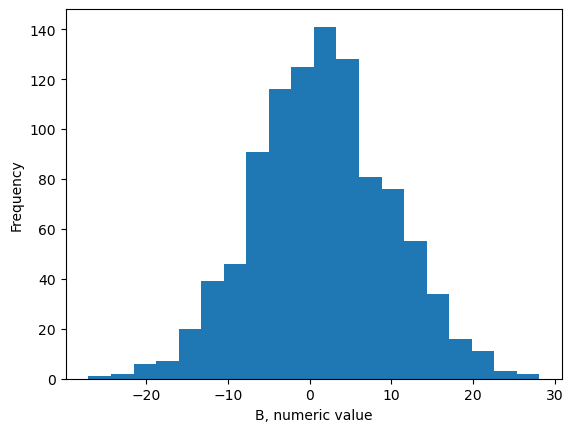

In [19]:
plt.hist(As, bins=20)
plt.xlabel("A, numeric value")
plt.ylabel("Frequency")
plt.show()

plt.hist(Bs, bins=20)
plt.xlabel("B, numeric value")
plt.ylabel("Frequency")
plt.show()

### C.4 Ajustement non linéaire - Pendule amorti

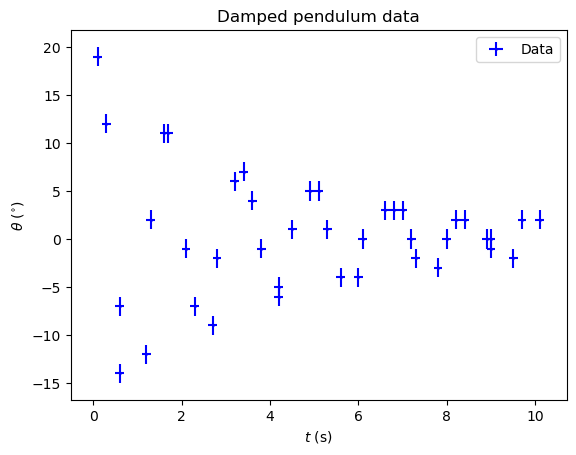

In [20]:
pendulum_table = pd.read_csv("data/TD2/Mesure_TP_pendule.csv")
#print(pendulum_table)

t = pendulum_table['t[s]']
t_std = pendulum_table['dt[s]']
theta = pendulum_table['theta[deg]']
theta_std = pendulum_table['dtheta[deg]']

plt.errorbar(t, theta, xerr=t_std, yerr=theta_std, color="b", fmt='o', markersize=1, label="Data")
plt.xlabel("$t$ (s)")
plt.ylabel(r"$\theta$ ($^{\circ}$)")
plt.title("Damped pendulum data")

plt.legend()
plt.show()
#print(pendulum_table['dt[s]'][0])

### Premier essai de modélisation

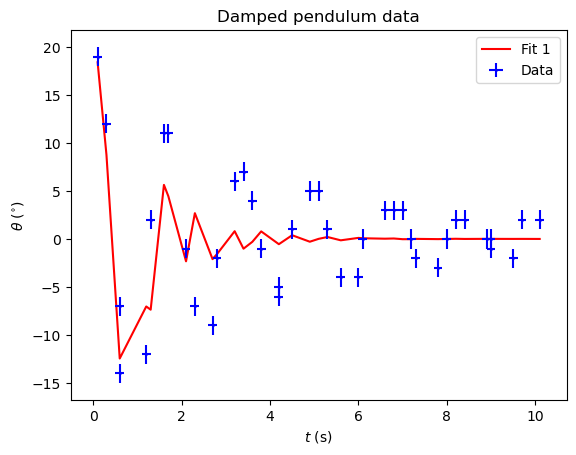

In [21]:
def damped_model(t, theta0, omeg, phi, alpha):
    return theta0*np.exp(-alpha*t)*np.cos(omeg*t + phi)

popt, pcov = curve_fit(damped_model, t, theta)

theta0, omeg, phi, alpha = popt

plt.plot(t, damped_model(t, theta0, omeg, phi, alpha), color="r", label="Fit 1")
plt.errorbar(t, theta, xerr=t_std, yerr=theta_std, color="b", fmt='o', markersize=1, label="Data")
plt.xlabel("$t$ (s)")
plt.ylabel(r"$\theta$ ($^{\circ}$)")
plt.title("Damped pendulum data")

plt.legend()
plt.show()


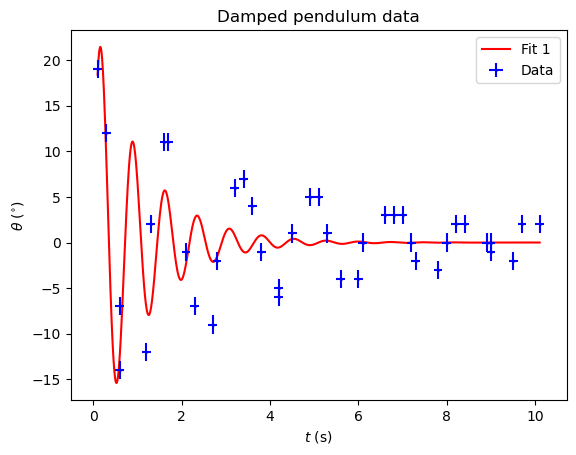

In [22]:
t_theo = np.linspace(np.min(t), np.max(t), 1000)

plt.plot(t_theo, damped_model(t_theo, theta0, omeg, phi, alpha), color="r", label="Fit 1")
plt.errorbar(t, theta, xerr=t_std, yerr=theta_std, color="b", fmt='o', markersize=1, label="Data")
plt.xlabel("$t$ (s)")
plt.ylabel(r"$\theta$ ($^{\circ}$)")
plt.title("Damped pendulum data")

plt.legend()
plt.show()

In [23]:
print("Fit parameters")
print(f"theta0 = {theta0}")
print(f"omega = {omeg}")
print(f"phi = {phi}")
print(f"alpha = {alpha}")

Fit parameters
theta0 = 24.949607869012546
omega = 8.615603448934264
phi = 11.073729861008026
alpha = 0.9066654247677949


However pretty it may be, this is a bad fit, the parameters we find do not correspond to the actual parameters of the physical pendulum (see TD2v1_portrait.pdf)

We are trying to optimise, find the global minimum in a 4 dimensional parameter space. Which is hard, the algorithm is likely to get stuck on local minimas. If we give our algorithm rough estimates of what our parameters are like, then it will likely perform better.

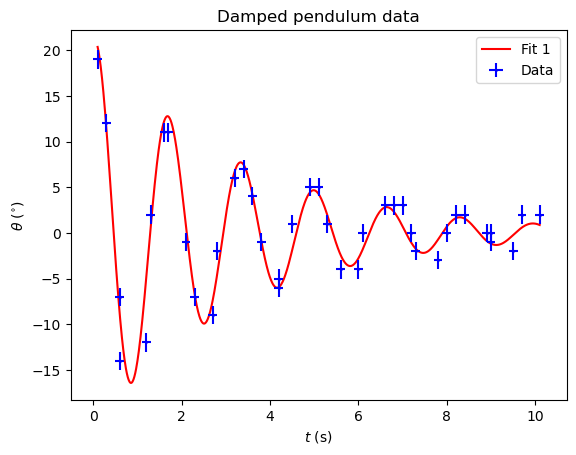

In [24]:
# sensible guesstimates for our initial parameters
theta0_init = np.max(theta)
T_init = 1.8 # rough estimate from scatter plot
omeg_init = 2*np.pi/T_init
phi_init = 0 # maximum of cosine curve seems to be close to 0


# exp(-alpha*3T) = 1/4
# after 3 periods, amplitude seems to decrease by factor of roughly 4
alpha_init = np.log(4)/(3*T_init)


popt, pcov = curve_fit(damped_model, t, theta, p0=[theta0_init, omeg_init, phi_init, alpha_init])

theta0_2 = popt[0]
omeg_2 = popt[1]
phi_2 = popt[2]
alpha_2 = popt[3]

plt.plot(t_theo, damped_model(t_theo, theta0_2, omeg_2, phi_2, alpha_2), color="r", label="Fit 1")
plt.errorbar(t, theta, xerr=t_std, yerr=theta_std, color="b", fmt='o', markersize=1, label="Data")
plt.xlabel("$t$ (s)")
plt.ylabel(r"$\theta$ ($^{\circ}$)")
plt.title("Damped pendulum data")

plt.legend()
plt.show()

In [25]:
print("Second fit parameters")
print(f"theta0 = {theta0_2}")
print(f"omega = {omeg_2}")
print(f"phi = {phi_2}")
print(f"alpha = {alpha_2}")

Second fit parameters
theta0 = 21.388303602790423
omega = 3.8019006708335548
phi = -0.18795918926990288
alpha = 0.30447607568779705


### Estimation des erreurs sur les paramètres d'ajustement (Monte Carlo)
Same thing as what was done with the linear fit

In [26]:
print(theta_std)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
Name: dtheta[deg], dtype: int64


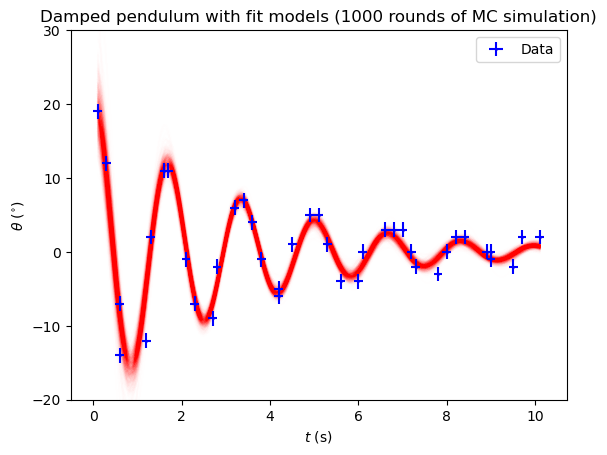

In [27]:
t_theo = np.linspace(np.min(t), np.max(t), 1000)


n_models = 1000
for i in range(n_models):

    # generate new dataset that follow the expected distribution
    t_mc, theta_mc = gen_dataset(t, theta, t_std, theta_std)

    popt, pcov = curve_fit(damped_model, t_mc, theta_mc, p0=[theta0_init, omeg_init, phi_init, alpha_init])
    theta0_i, omeg_i, phi_i, alpha_i = popt
    #print(popt)

    # plotting the fit
    plt.plot(t_theo, damped_model(t_theo, theta0_i, omeg_i, phi_i, alpha_i), color="r", alpha=5/n_models, zorder=-1)

plt.errorbar(t, theta, xerr=t_std, yerr=theta_std, color="b", fmt='o', markersize=1, label="Data")
plt.xlabel("$t$ (s)")
plt.ylabel(r"$\theta$ ($^{\circ}$)")
plt.title(f"Damped pendulum with fit models ({n_models} rounds of MC simulation)")

plt.ylim((-20, 30))

plt.legend()
plt.show()